In [2]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

### Preparing the Data Set

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/amazon-products-dataset/Gaming Consoles.csv
/kaggle/input/amazon-products-dataset/Car Electronics.csv
/kaggle/input/amazon-products-dataset/Janitorial and Sanitation Supplies.csv
/kaggle/input/amazon-products-dataset/All Electronics.csv
/kaggle/input/amazon-products-dataset/All Books.csv
/kaggle/input/amazon-products-dataset/Make-up.csv
/kaggle/input/amazon-products-dataset/Travel Accessories.csv
/kaggle/input/amazon-products-dataset/Indian Language Books.csv
/kaggle/input/amazon-products-dataset/Car and Bike Care.csv
/kaggle/input/amazon-products-dataset/Sunglasses.csv
/kaggle/input/amazon-products-dataset/Bags and Luggage.csv
/kaggle/input/amazon-products-dataset/Yoga.csv
/kaggle/input/amazon-products-dataset/Sportswear.csv
/kaggle/input/amazon-products-dataset/Fiction Books.csv
/kaggle/input/amazon-products-dataset/Exam Central.csv
/kaggle/input/amazon-products-dataset/Home Storage.csv
/kaggle/input/amazon-products-dataset/Toys Gifting Store.csv
/kaggle/input/amazon-pr

## Importing the Data

In [4]:
data = pd.read_csv("/kaggle/input/amazon-products-dataset/Amazon-Products.csv")

data.head()


,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

### As you can see few columns should have different types etc. no_of_ratings, discount_price. We are going to change these colunms' types


In [7]:

data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['no_of_ratings'] = data['no_of_ratings'].replace(',', '', regex=True).astype(float)
data['discount_price'] = data['discount_price'].replace('[₹,]', '', regex=True).astype(float)
data['actual_price'] = data['actual_price'].replace('[₹,]', '', regex=True).astype(float)

print(data.dtypes)

print(data[['ratings', 'no_of_ratings', 'discount_price', 'actual_price']].head())


ValueError: could not convert string to float: 'Only 2 left in stock.'

### It seems like we encountered an anormal type of variable so we need to make a more detailed converting process

In [8]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

data['no_of_ratings'] = data['no_of_ratings'].str.replace(',', '', regex=True).str.extract('(\d+)').astype(float)

data['discount_price'] = data['discount_price'].str.replace('[₹,]', '', regex=True).str.extract('(\d+)').astype(float)

data['actual_price'] = data['actual_price'].str.replace('[₹,]', '', regex=True).str.extract('(\d+)').astype(float)

print(data.dtypes)


name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
dtype: object


## Cleaning the Data

In [9]:
data.isna().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           182027
no_of_ratings     179090
discount_price     61163
actual_price       17813
dtype: int64

In [10]:
data.shape

(551585, 9)

### It seems like we are missing quite a lot data so we are going to fill them instead dropping

In [11]:
data['ratings'] = data['ratings'].fillna(data['ratings'].median())
data['no_of_ratings'] = data['no_of_ratings'].fillna(data['no_of_ratings'].median())
data['discount_price'] = data['discount_price'].fillna(data['discount_price'].median())
data['actual_price'] = data['actual_price'].fillna(data['actual_price'].median())

In [12]:
data.isna().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

## Feature Engineering

In [13]:
data['discount_percentage'] = ((data['actual_price'] - data['discount_price']) / data['actual_price']) * 100

In [14]:
data['revenue_potential'] = data['discount_price'] * data['no_of_ratings']

In [15]:
data['elasticity'] = data.groupby('main_category')['no_of_ratings'].transform('sum') / data.groupby('main_category')['discount_price'].transform('sum')

In [16]:
data.head(5)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,revenue_potential,elasticity
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,44.060010,74412745.0,0.111694
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,38.820897,137052520.0,0.111694
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,44.361994,41594940.0,0.111694
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0,44.934048,2621310.0,0.111694
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0,49.122289,21728700.0,0.111694


### Elasticity Near 0 = Demand is inelastic, meaning that changes in price have little to no effect on demand.

### Elasticity Close to 1 = Demand is unit elastic, meaning that a 1% change in price leads to an approximately 1% change in demand.

### Elasticity Greater Than 1 = Demand is elastic, meaning that customers are highly sensitive to price changes. A small decrease in price leads to a significant increase in demand.

In [17]:
category_elasticity = (
    data.groupby('main_category')
    .apply(lambda group: group['no_of_ratings'].sum() / group['discount_price'].sum())
    .reset_index(name='elasticity')
)

print(category_elasticity)

              main_category  elasticity
0               accessories    0.021079
1                appliances    0.111694
2            bags & luggage    0.081583
3           beauty & health    1.488222
4           car & motorbike    0.230199
5   grocery & gourmet foods    0.989390
6            home & kitchen    0.712425
7       home, kitchen, pets    0.002567
8       industrial supplies    0.130651
9             kids' fashion    0.173640
10           men's clothing    0.089342
11              men's shoes    0.076182
12                    music    0.092611
13             pet supplies    0.821584
14         sports & fitness    0.142310
15                   stores    0.524610
16     toys & baby products    2.337891
17      tv, audio & cameras    0.882831
18         women's clothing    0.288449
19            women's shoes    0.111277


In [18]:
data.describe()

,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,revenue_potential,elasticity
count,551585.000000,551585.000000,5.515850e+05,5.515850e+05,5.515850e+05,5.515850e+05,551585.000000
mean,3.854649,569.822069,2.407570e+03,2.241655e+04,-inf,1.318088e+06,0.307795
std,0.619710,7092.062931,8.939269e+03,1.333022e+07,NaN,3.058525e+07,0.398227
min,1.000000,1.000000,8.000000e+00,0.000000e+00,-inf,1.900000e+01,0.002567
25%,3.700000,9.000000,3.990000e+02,9.990000e+02,3.498734e+01,4.980000e+03,0.076182
50%,3.900000,20.000000,6.790000e+02,1.599000e+03,5.205205e+01,1.398000e+04,0.111694
75%,4.100000,49.000000,1.249000e+03,2.999000e+03,6.668890e+01,6.240000e+04,0.288449
max,5.000000,589547.000000,1.249990e+06,9.900000e+09,9.999999e+01,9.196933e+09,2.337891


### It seems like we need to clear outliers of actual prices and discount price columns. -inf indicates there is 0 values to handle in these 2 columns.

In [19]:
Q1_actual_price = data['actual_price'].quantile(0.25)
Q3_actual_price = data['actual_price'].quantile(0.75)
IQR_actual_price = Q3_actual_price - Q1_actual_price

lower_bound_actual_price = Q1_actual_price - 1.5 * IQR_actual_price
upper_bound_actual_price = Q3_actual_price + 1.5 * IQR_actual_price

data = data[(data['actual_price'] >= lower_bound_actual_price) & (data['actual_price'] <= upper_bound_actual_price)]

Q1_discount_price = data['discount_price'].quantile(0.25)
Q3_discount_price = data['discount_price'].quantile(0.75)
IQR_discount_price = Q3_discount_price - Q1_discount_price

lower_bound_discount_price = Q1_discount_price - 1.5 * IQR_discount_price
upper_bound_discount_price = Q3_discount_price + 1.5 * IQR_discount_price

data = data[(data['discount_price'] >= lower_bound_discount_price) & (data['discount_price'] <= upper_bound_discount_price)]

data[['actual_price', 'discount_price']].describe()

,actual_price,discount_price
count,447915.000000,447915.000000
mean,1556.318889,663.997982
std,1033.545436,392.878016
min,0.000000,8.000000
25%,800.000000,361.000000
50%,1299.000000,599.000000
75%,1999.000000,839.000000
max,5999.000000,1911.000000


In [20]:
data.describe()

,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,revenue_potential,elasticity
count,447915.000000,447915.000000,447915.000000,447915.000000,4.479150e+05,4.479150e+05,447915.000000
mean,3.833944,518.434160,663.997982,1556.318889,-inf,3.618954e+05,0.316164
std,0.627936,6885.820128,392.878016,1033.545436,NaN,5.575410e+06,0.404930
min,1.000000,1.000000,8.000000,0.000000,-inf,1.900000e+01,0.002567
25%,3.700000,8.000000,361.000000,800.000000,3.839733e+01,3.980000e+03,0.076182
50%,3.900000,20.000000,599.000000,1299.000000,5.505506e+01,1.269800e+04,0.111694
75%,4.000000,51.000000,839.000000,1999.000000,6.753377e+01,3.131700e+04,0.288449
max,5.000000,589547.000000,1911.000000,5999.000000,9.900000e+01,1.005178e+09,2.337891


### We removed outliers from the data set and achieved more realistic price ranges. Now we are going to remove 0 values and recalculate discount percentages.

In [21]:
data = data[data['actual_price'] > 0]
data['discount_percentage'] = ((data['actual_price'] - data['discount_price']) / data['actual_price']) * 100

In [22]:
data.describe()

,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,revenue_potential,elasticity
count,447912.000000,447912.000000,447912.000000,447912.000000,447912.000000,4.479120e+05,447912.000000
mean,3.833943,518.427526,663.997881,1556.329312,47.621168,3.618910e+05,0.316161
std,0.627937,6885.840557,392.879330,1033.541049,60.208821,5.575428e+06,0.404930
min,1.000000,1.000000,8.000000,4.000000,-16875.000000,1.900000e+01,0.002567
25%,3.700000,8.000000,361.000000,800.000000,38.397329,3.980000e+03,0.076182
50%,3.900000,20.000000,599.000000,1299.000000,55.055055,1.269600e+04,0.111694
75%,4.000000,51.000000,839.000000,1999.000000,67.533767,3.131700e+04,0.288449
max,5.000000,589547.000000,1911.000000,5999.000000,99.000000,1.005178e+09,2.337891


### There is an unusual value of -16875 in discount percentage column. This observation suggests there could be few actual prices that lower than discount prices. We are going to fix them.

In [23]:
data = data[data['actual_price'] >= data['discount_price']]
data['discount_percentage'] = ((data['actual_price'] - data['discount_price']) / data['actual_price']) * 100
data['revenue_potential'] = data['discount_price'] * data['no_of_ratings']
data.describe()

,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,revenue_potential,elasticity
count,435956.000000,435956.000000,435956.000000,435956.000000,435956.000000,4.359560e+05,435956.000000
mean,3.831371,519.590124,663.586451,1588.416368,52.722035,3.629513e+05,0.312974
std,0.628902,6959.849381,398.222257,1028.716911,20.389604,5.640107e+06,0.400900
min,1.000000,1.000000,8.000000,10.000000,0.000000,1.900000e+01,0.002567
25%,3.700000,8.000000,354.000000,899.000000,40.030793,3.969000e+03,0.076182
50%,3.900000,20.000000,599.000000,1381.000000,56.019340,1.242000e+04,0.111694
75%,4.000000,50.000000,849.000000,1999.000000,68.045364,3.095200e+04,0.288449
max,5.000000,589547.000000,1911.000000,5999.000000,99.000000,1.005178e+09,2.337891


## Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435956 entries, 76 to 551584
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 435956 non-null  object 
 1   main_category        435956 non-null  object 
 2   sub_category         435956 non-null  object 
 3   image                435956 non-null  object 
 4   link                 435956 non-null  object 
 5   ratings              435956 non-null  float64
 6   no_of_ratings        435956 non-null  float64
 7   discount_price       435956 non-null  float64
 8   actual_price         435956 non-null  float64
 9   discount_percentage  435956 non-null  float64
 10  revenue_potential    435956 non-null  float64
 11  elasticity           435956 non-null  float64
dtypes: float64(7), object(5)
memory usage: 43.2+ MB


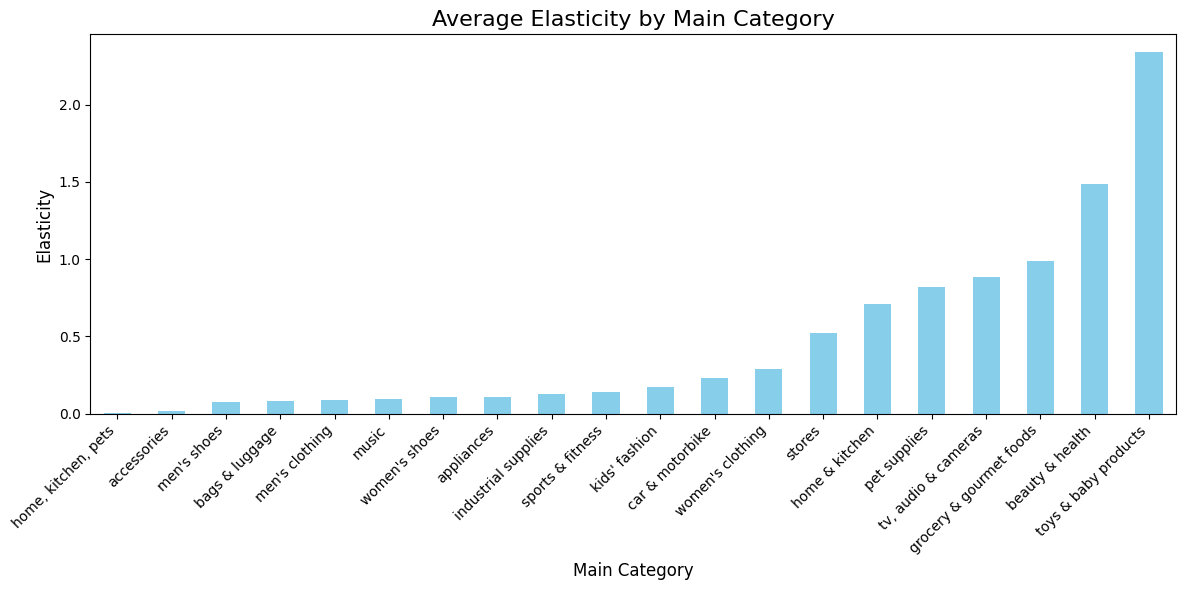

In [26]:
category_elasticity = data.groupby('main_category')['elasticity'].mean().sort_values()

plt.figure(figsize=(12, 6))
category_elasticity.plot(kind='bar', color='skyblue')
plt.title('Average Elasticity by Main Category', fontsize=16)
plt.xlabel('Main Category', fontsize=12)
plt.ylabel('Elasticity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

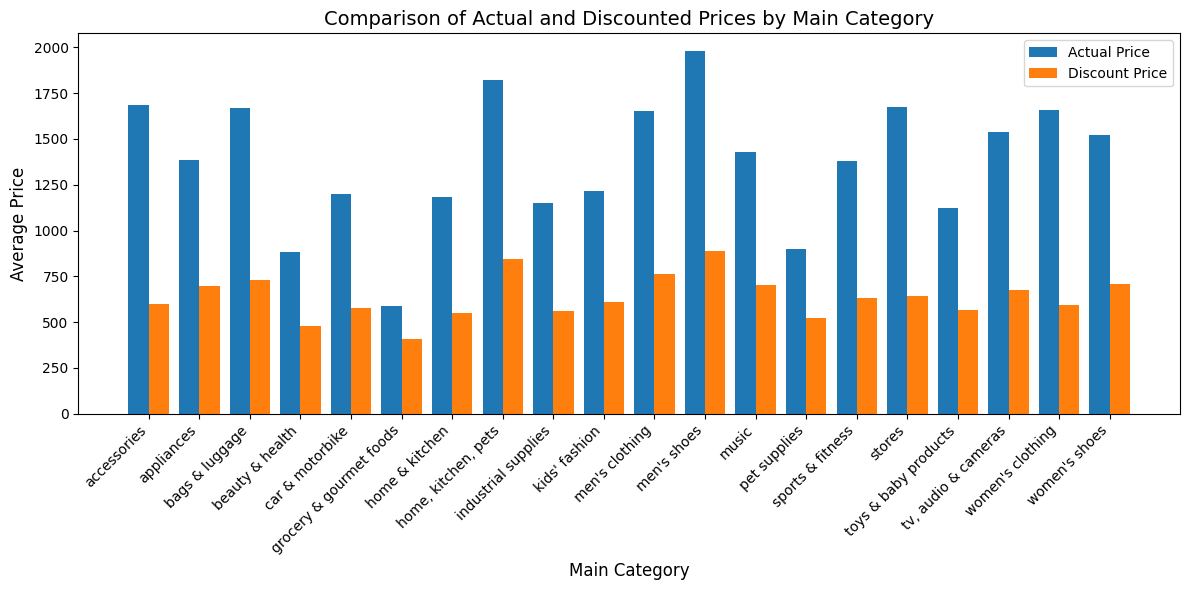

In [27]:
category_prices = data.groupby('main_category')[['actual_price', 'discount_price']].mean().reset_index()

plt.figure(figsize=(12, 6))

bar_width = 0.4

x = range(len(category_prices['main_category']))

plt.bar(x, category_prices['actual_price'], width=bar_width, label='Actual Price', align='center')
plt.bar([p + bar_width for p in x], category_prices['discount_price'], width=bar_width, label='Discount Price', align='center')

plt.xlabel('Main Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

plt.title('Comparison of Actual and Discounted Prices by Main Category', fontsize=14)

plt.xticks([p + bar_width / 2 for p in x], category_prices['main_category'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

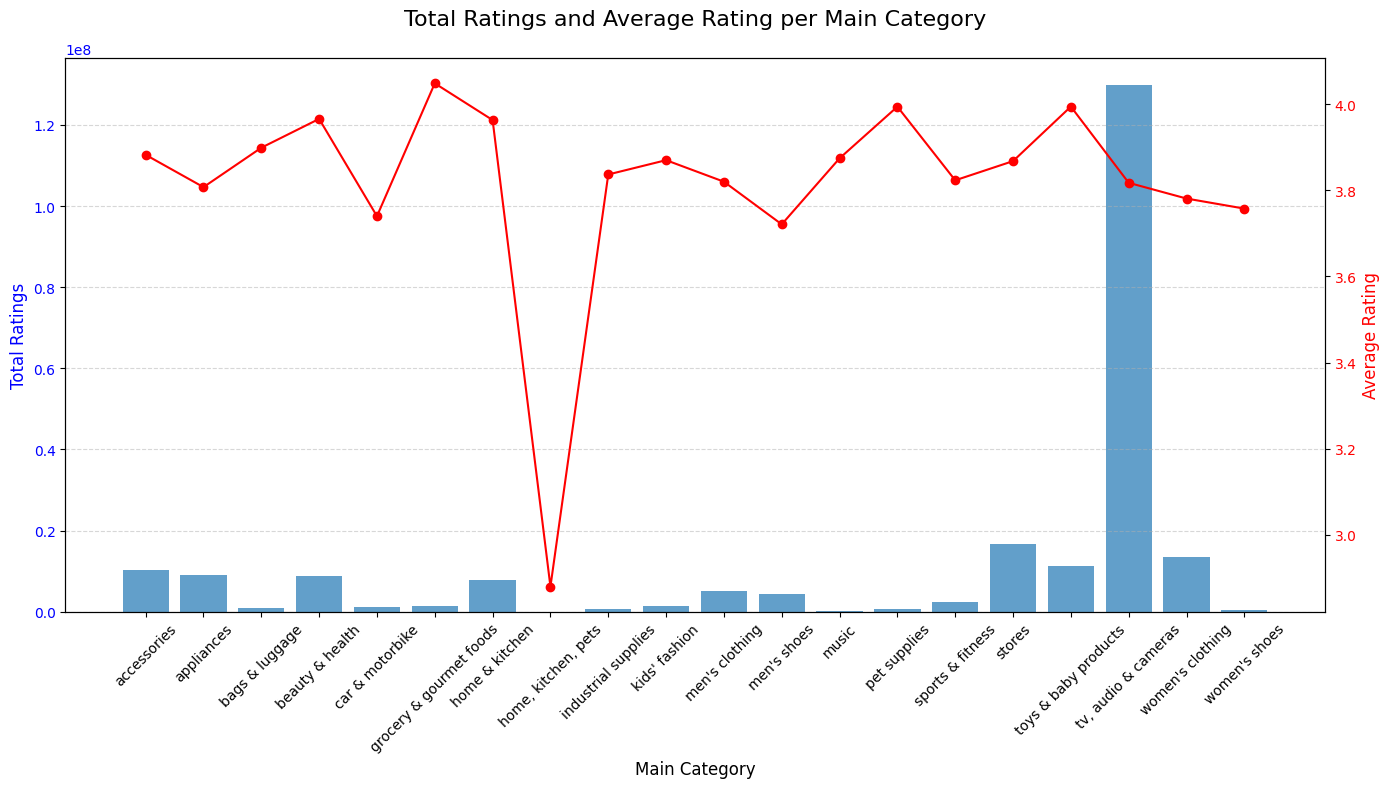

In [28]:
main_category_data = data.groupby('main_category').agg(
    avg_rating=('ratings', 'mean'),
    total_ratings=('no_of_ratings', 'sum')
).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.bar(main_category_data['main_category'], main_category_data['total_ratings'], alpha=0.7, label='Total Ratings')
ax1.set_xlabel('Main Category', fontsize=12)
ax1.set_ylabel('Total Ratings', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
ax2.plot(main_category_data['main_category'], main_category_data['avg_rating'], color='red', marker='o', label='Average Rating')
ax2.set_ylabel('Average Rating', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Total Ratings and Average Rating per Main Category', fontsize=16)
fig.tight_layout()
plt.show()


In [29]:
unique_subcategories_count = data['sub_category'].nunique()
unique_subcategories_count

112

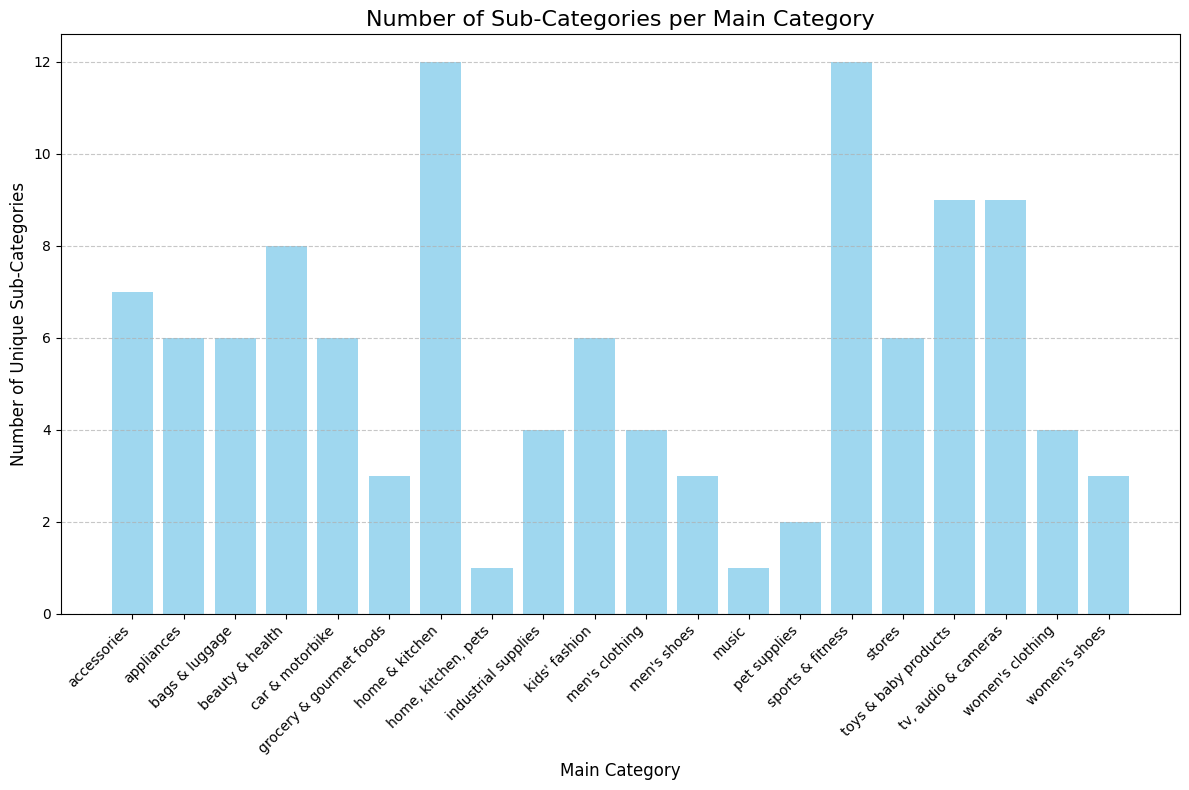

In [30]:
main_category_subcategory_count = data.groupby('main_category')['sub_category'].nunique().reset_index()
main_category_subcategory_count = main_category_subcategory_count.rename(columns={'sub_category': 'unique_subcategories'})

plt.figure(figsize=(12, 8))
plt.bar(main_category_subcategory_count['main_category'], main_category_subcategory_count['unique_subcategories'], color='skyblue', alpha=0.8)
plt.title('Number of Sub-Categories per Main Category', fontsize=16)
plt.xlabel('Main Category', fontsize=12)
plt.ylabel('Number of Unique Sub-Categories', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

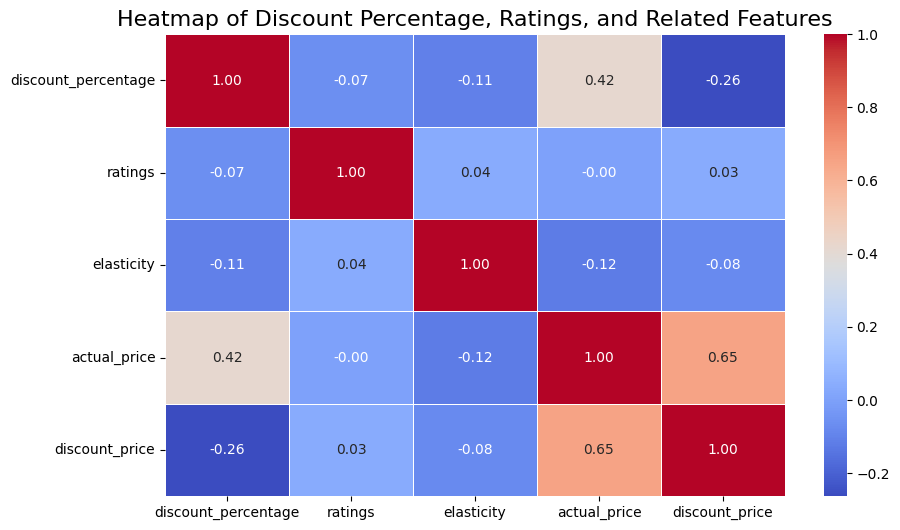

In [31]:
heatmap_data = data[['discount_percentage', 'ratings', 'elasticity', 'actual_price', 'discount_price']]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap of Discount Percentage, Ratings, and Related Features', fontsize=16)
plt.show()

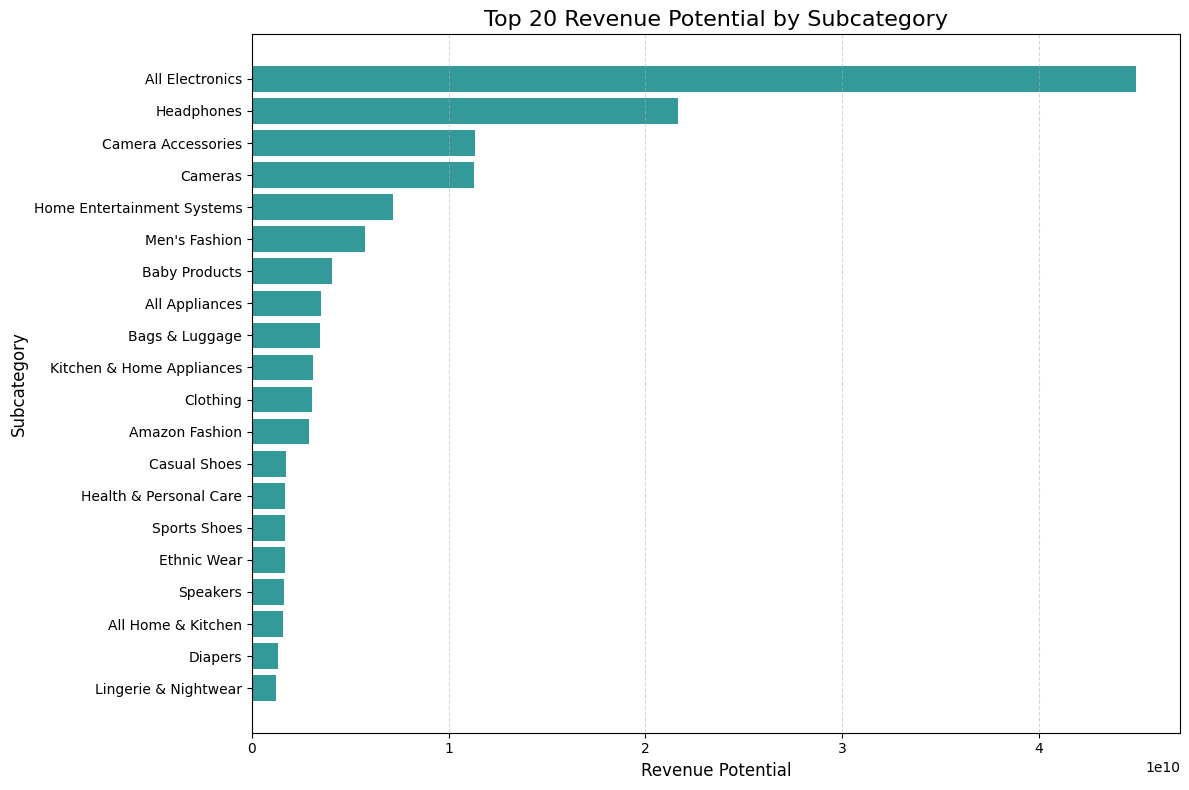

In [36]:
subcategory_revenue = data.groupby('sub_category')['revenue_potential'].sum().reset_index()
subcategory_revenue = subcategory_revenue.sort_values(by='revenue_potential', ascending=False)
top_subcategory_revenue = subcategory_revenue.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_subcategory_revenue['sub_category'], top_subcategory_revenue['revenue_potential'], color='teal', alpha=0.8)
plt.title('Top 20 Revenue Potential by Subcategory', fontsize=16)
plt.xlabel('Revenue Potential', fontsize=12)
plt.ylabel('Subcategory', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

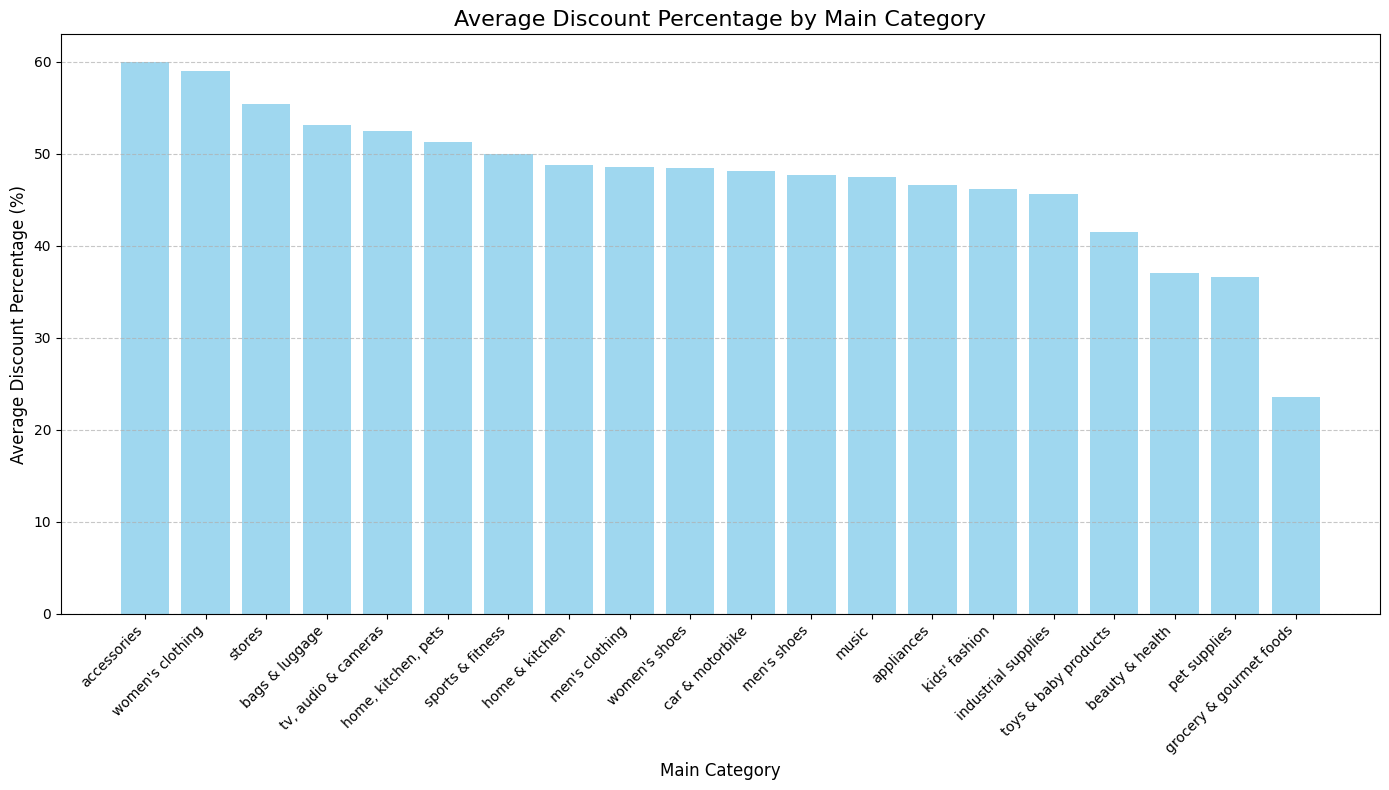

In [37]:
main_category_discount = data.groupby('main_category')['discount_percentage'].mean().reset_index()

main_category_discount = main_category_discount.sort_values(by='discount_percentage', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(main_category_discount['main_category'], main_category_discount['discount_percentage'], color='skyblue', alpha=0.8)
plt.title('Average Discount Percentage by Main Category', fontsize=16)
plt.xlabel('Main Category', fontsize=12)
plt.ylabel('Average Discount Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Data Processing

In [40]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['main_category', 'sub_category']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data[categorical_columns].head()

,main_category,sub_category
76,1,0
100,1,0
114,1,0
123,1,0
125,1,0


### Dropping the unnecessary columns

In [49]:
data.drop('name', axis=1, inplace=True)
data.drop('image', axis=1, inplace=True)
data.drop('link', axis=1, inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435956 entries, 76 to 551584
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   main_category        435956 non-null  int64  
 1   sub_category         435956 non-null  int64  
 2   ratings              435956 non-null  float64
 3   no_of_ratings        435956 non-null  float64
 4   discount_price       435956 non-null  float64
 5   actual_price         435956 non-null  float64
 6   discount_percentage  435956 non-null  float64
 7   revenue_potential    435956 non-null  float64
 8   elasticity           435956 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 49.4 MB


In [51]:
data.corr()

,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,revenue_potential,elasticity
main_category,1.000000,0.065586,-0.048449,0.044880,0.032047,0.021725,-0.006074,0.041205,0.387109
sub_category,0.065586,1.000000,-0.032597,-0.063036,0.043156,-0.006380,-0.021341,-0.056420,-0.119036
ratings,-0.048449,-0.032597,1.000000,0.033397,0.034590,-0.001218,-0.065661,0.029385,0.037388
no_of_ratings,0.044880,-0.063036,0.033397,1.000000,0.006552,0.004943,-0.007288,0.863460,0.087632
discount_price,0.032047,0.043156,0.034590,0.006552,1.000000,0.653143,-0.263372,0.047072,-0.080243
actual_price,0.021725,-0.006380,-0.001218,0.004943,0.653143,1.000000,0.416611,0.036124,-0.124901
discount_percentage,-0.006074,-0.021341,-0.065661,-0.007288,-0.263372,0.416611,1.000000,-0.009200,-0.110210
revenue_potential,0.041205,-0.056420,0.029385,0.863460,0.047072,0.036124,-0.009200,1.000000,0.076427
elasticity,0.387109,-0.119036,0.037388,0.087632,-0.080243,-0.124901,-0.110210,0.076427,1.000000


### Correlation Matrix

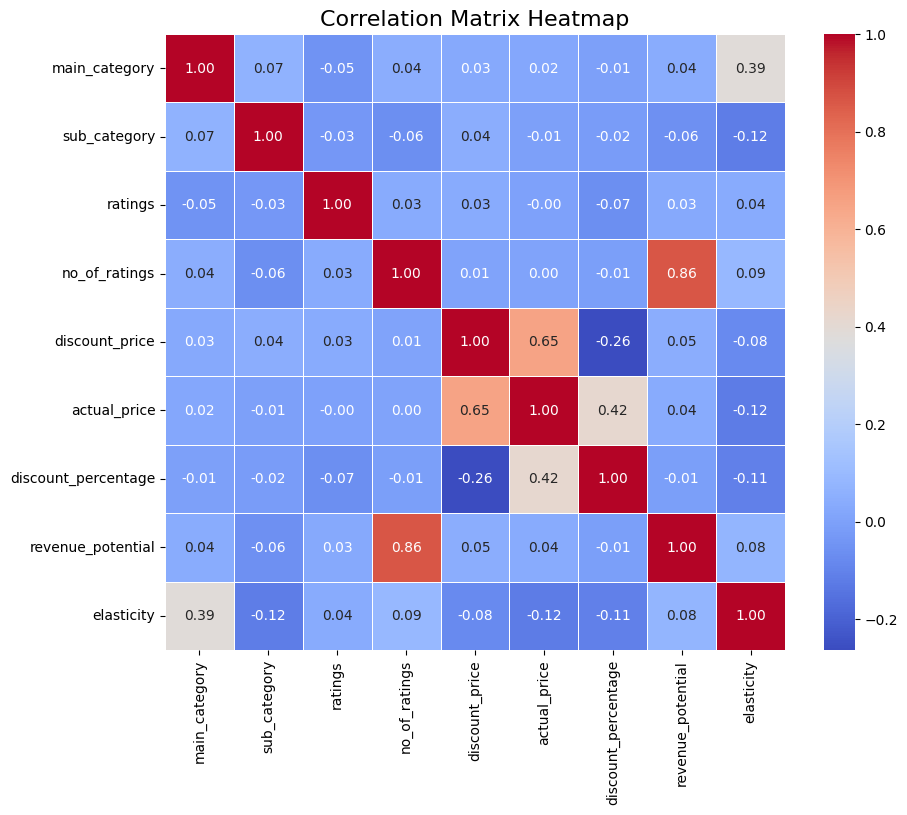

In [52]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()